# Dataset Cleaning process

This code deals with cleaning data and basic data exploration for the data provided by [the World Bank on Forested area cover of different regions of the world](https://data.worldbank.org/indicator/AG.LND.FRST.ZS?view=chart)

In this example we have manually downloaded the data (available in the same github repository) and are parsing the two csv files, forest_cover and country_metadata.
Forest Cover CSV is used as the raw data for regionwise forested area percentage.
Country metadata is used to create groupings for different types of regions for the former CSV file.

In [1]:
#Load libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Load dataframes
df = pd.read_csv('forest_cover.csv',skiprows=4)
df_metadata = pd.read_csv('country_metadata.csv')
df=df.drop([str(i) for i in range(1960,1990,1)]+['2022','2023','Unnamed: 68', 'Indicator Name','Indicator Code'],axis=1)
df_metadata=df_metadata.drop('SpecialNotes',axis=1)
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  265 non-null    object
 1   Region        217 non-null    object
 2   IncomeGroup   216 non-null    object
 3   TableName     265 non-null    object
dtypes: object(4)
memory usage: 8.4+ KB


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   1990          218 non-null    float64
 3   1991          222 non-null    float64
 4   1992          251 non-null    float64
 5   1993          254 non-null    float64
 6   1994          254 non-null    float64
 7   1995          254 non-null    float64
 8   1996          254 non-null    float64
 9   1997          254 non-null    float64
 10  1998          254 non-null    float64
 11  1999          254 non-null    float64
 12  2000          256 non-null    float64
 13  2001          256 non-null    float64
 14  2002          256 non-null    float64
 15  2003          256 non-null    float64
 16  2004          256 non-null    float64
 17  2005          256 non-null    float64
 18  2006          258 non-null    

In [4]:
#We will add Country Name to metadata DF and drop it from primary DF keeping only country code
df_metadata=pd.merge(df[['Country Name', 'Country Code']],df_metadata,on='Country Code')

In [5]:
df=df.drop('Country Name',axis=1)

In [6]:
#Drop columns where all data is NA
df = df[df.isna().sum(axis=1)<32]

In [7]:
#Drop rows where all data is NA
df=df[df.sum(numeric_only=True,axis=1)>0]


In [8]:
#Create filters for Geographical regions, and different income levels
is_region = df_metadata.loc[df_metadata.Region.isna()]['Country Code'].tolist()
income_levels = df_metadata.dropna().IncomeGroup.unique().tolist()
#print(income_levels)
low_income_countries, low_mid_income_countries, upper_mid_income_countries, high_income_countries =(df_metadata[df_metadata.IncomeGroup==i]['Country Code'].tolist() for i in income_levels)


In [9]:
#Unused - keep for reference
# DF showing y-o-y trend instead of cumulative area

#sns.lineplot(data=df_m.loc[df_m.country_code.isin(low_income_countries)],x='Year',y='forested_area_perc',hue='country_code')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#plt.xticks(rotation=45);
df_m = df[[str(i) for i in range(1990,2022) ]].diff(axis=1).join(df['Country Code'])

In [10]:
#Melt and show data, final cleaning
df_m=df.melt(id_vars='Country Code',value_name='forested_area_perc',var_name='Year')
df_m=df_m.rename(columns={'Country Code':'country_code'})
df_m.Year=df_m.Year.astype(int)
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8256 entries, 0 to 8255
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        8256 non-null   object 
 1   Year                8256 non-null   int32  
 2   forested_area_perc  8048 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 161.4+ KB


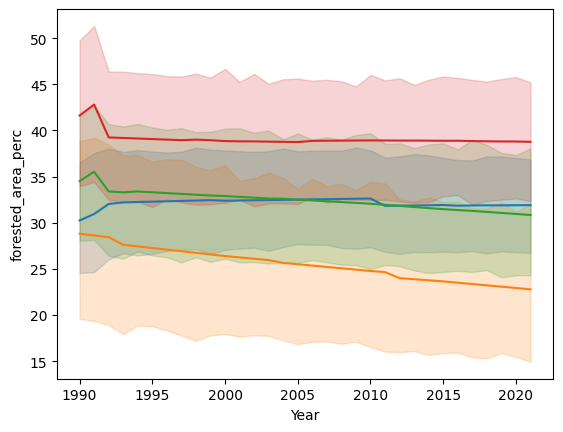

In [11]:
#Plot income based line graph
sns.lineplot(data=df_m.loc[df_m.country_code.isin(low_income_countries)],x='Year',y='forested_area_perc');
sns.lineplot(data=df_m.loc[df_m.country_code.isin(low_mid_income_countries)],x='Year',y='forested_area_perc');
sns.lineplot(data=df_m.loc[df_m.country_code.isin(upper_mid_income_countries)],x='Year',y='forested_area_perc');
sns.lineplot(data=df_m.loc[df_m.country_code.isin(high_income_countries)],x='Year',y='forested_area_perc');
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#plt.xticks(rotation=45);
#plt.ylim((0,100));
#plt.axhline(y=0, color='k');


In [12]:
#Extract region name using code. We will use this for title of chart
df_metadata[df_metadata['Country Code']==is_region[0]].TableName.tolist()[0]


'Africa Eastern and Southern'

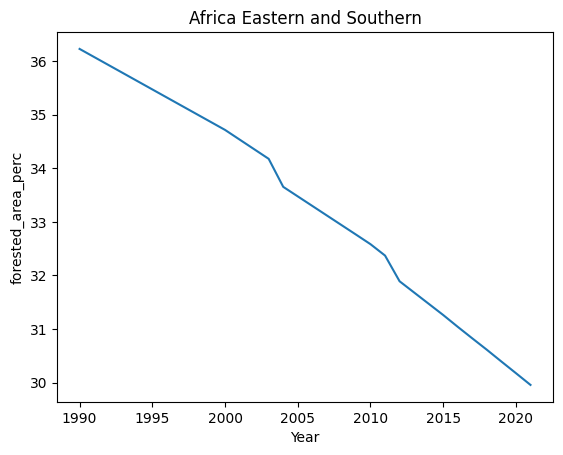

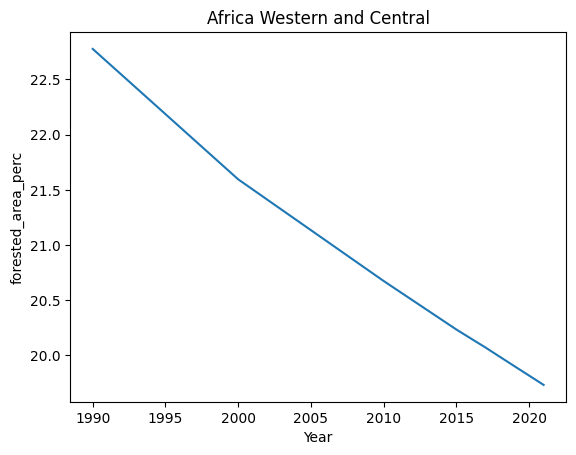

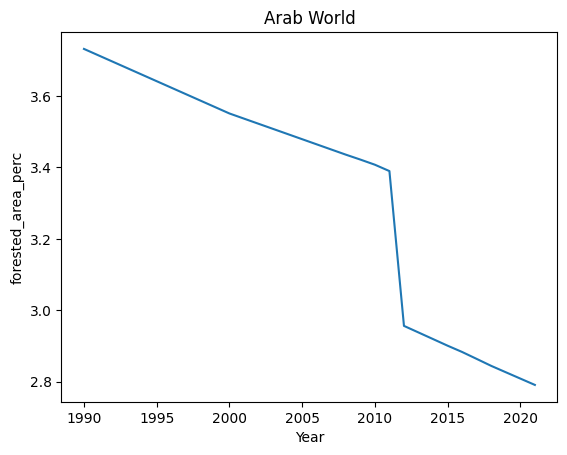

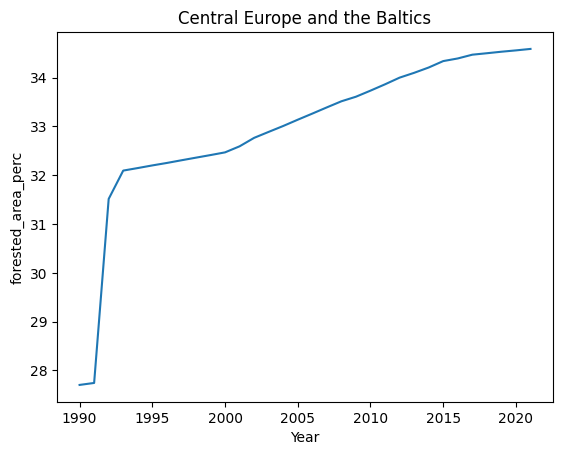

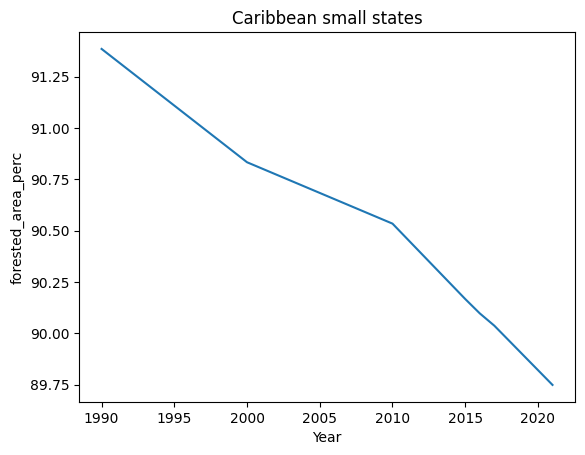

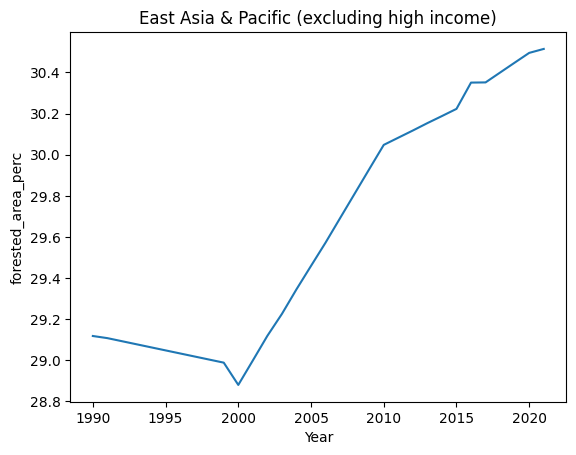

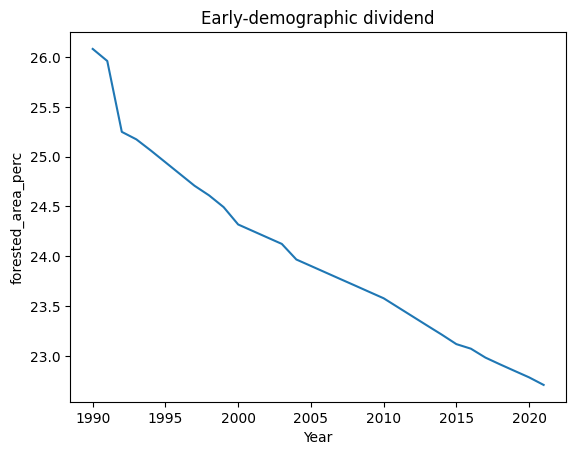

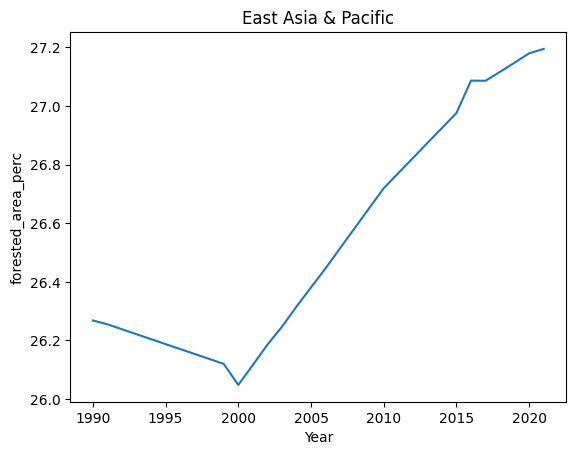

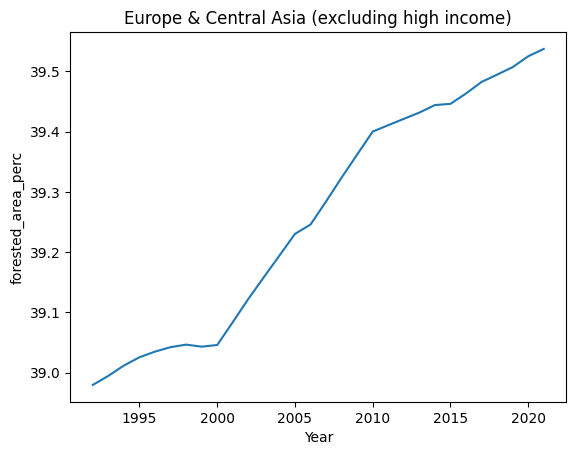

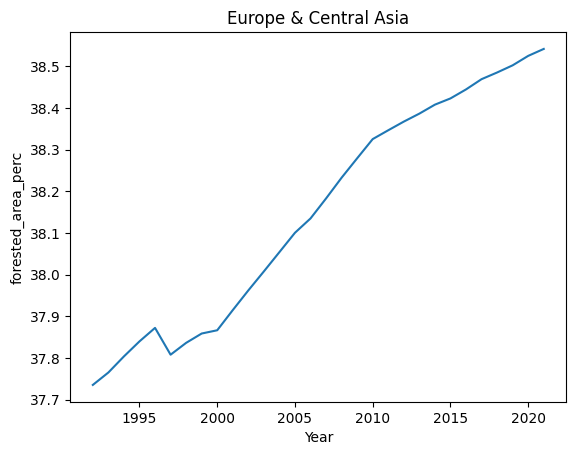

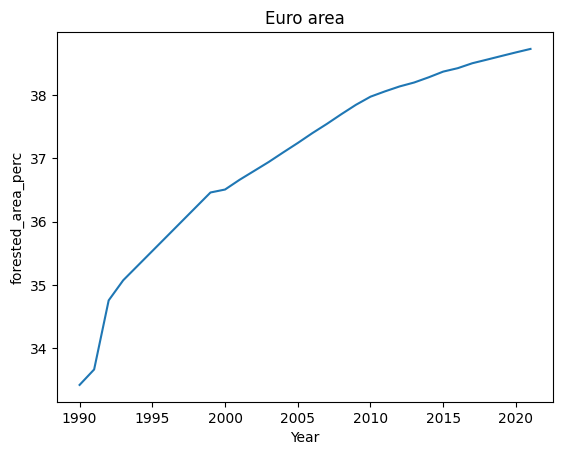

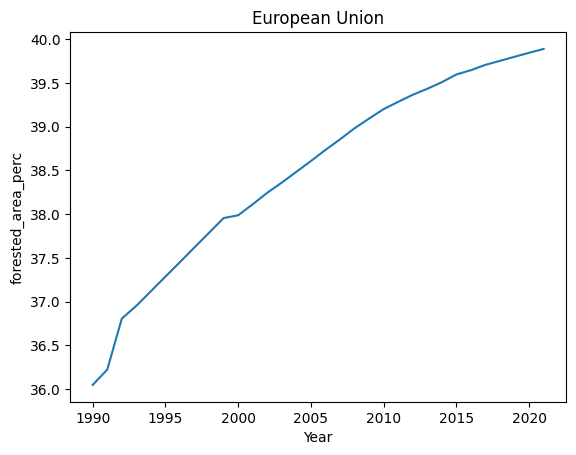

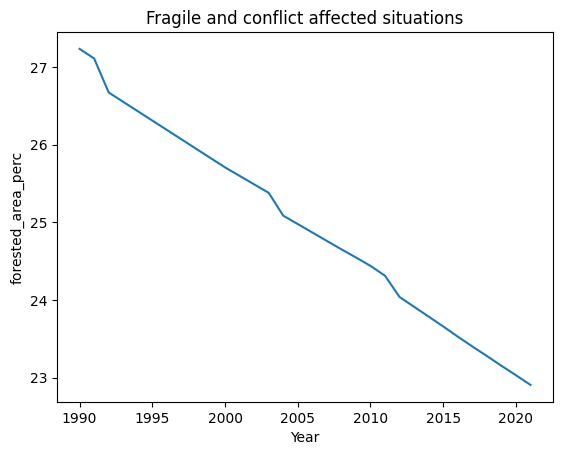

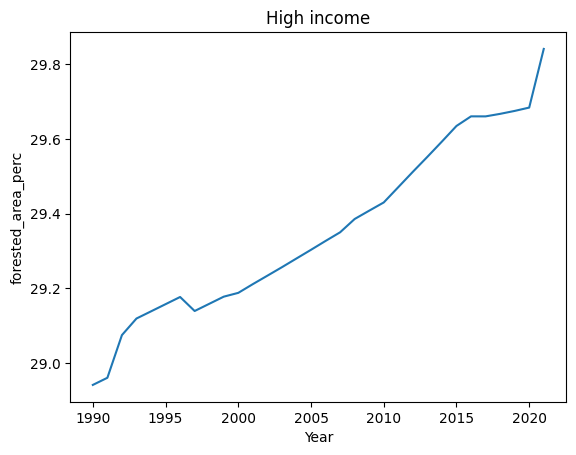

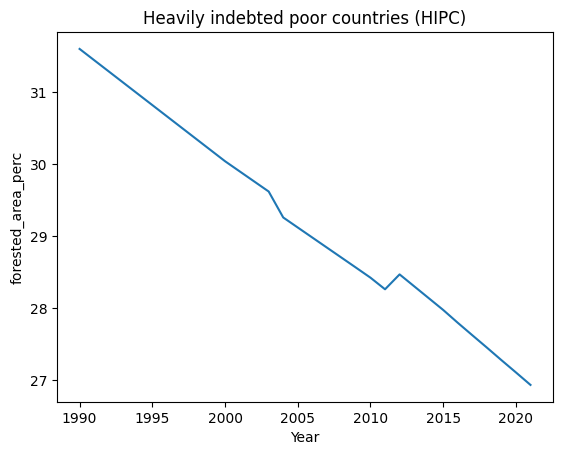

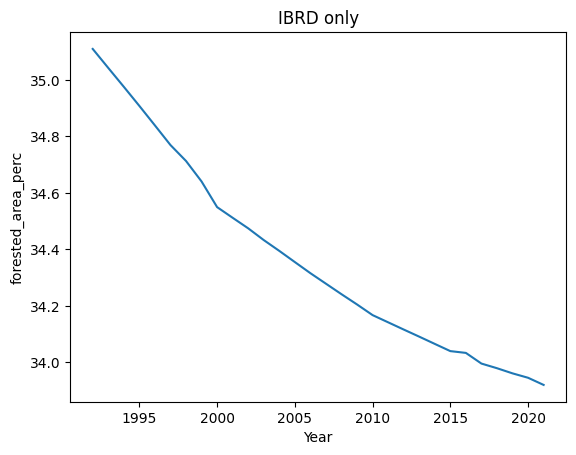

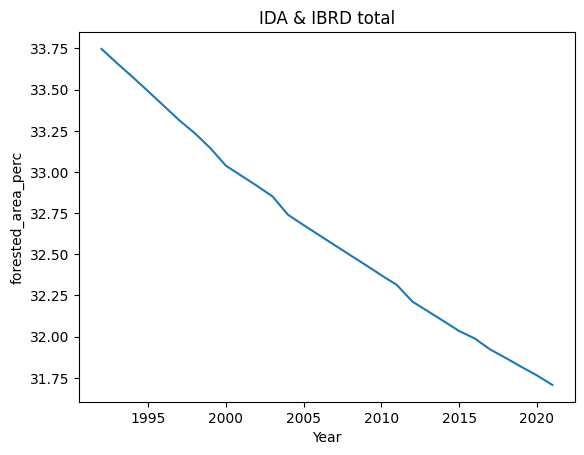

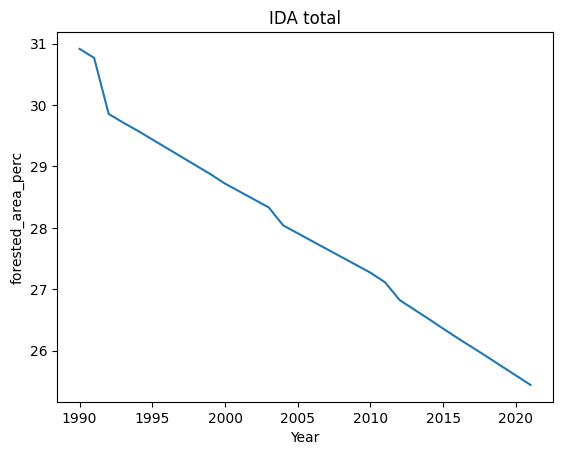

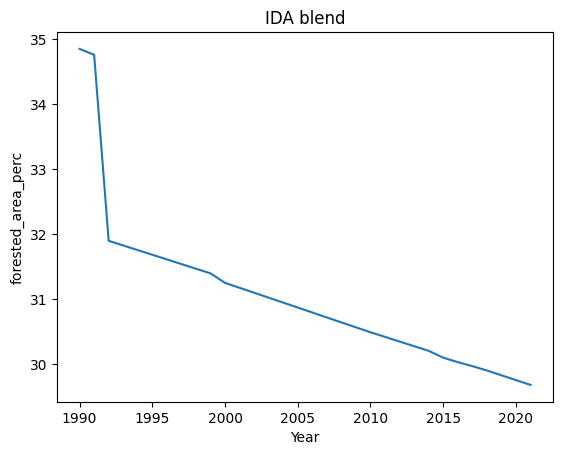

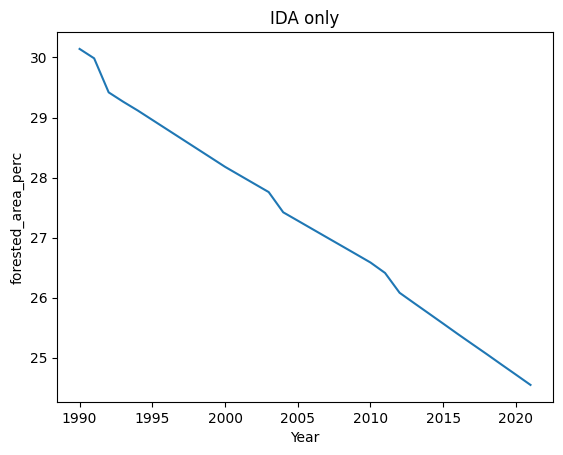

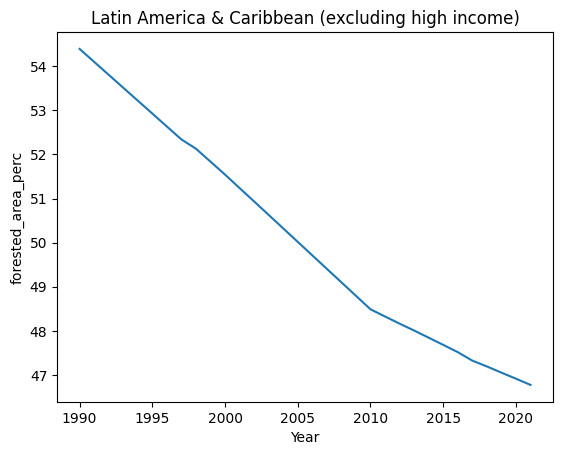

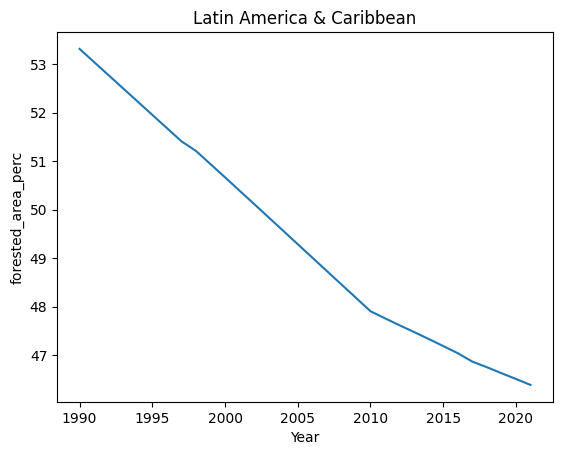

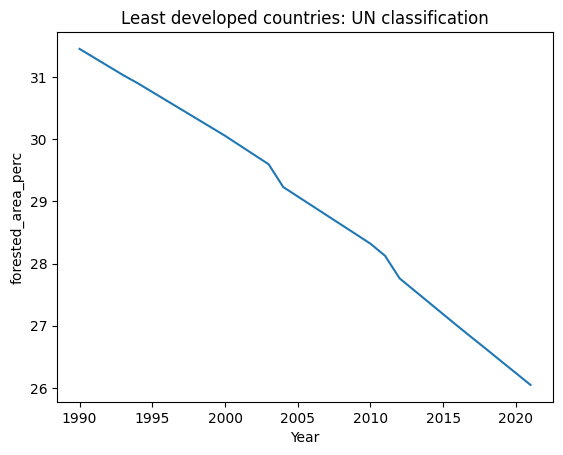

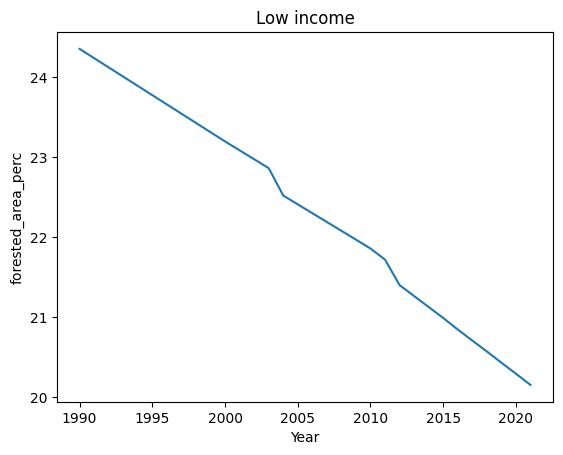

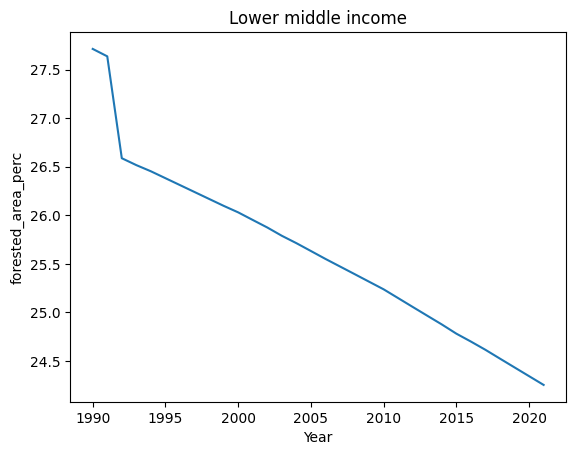

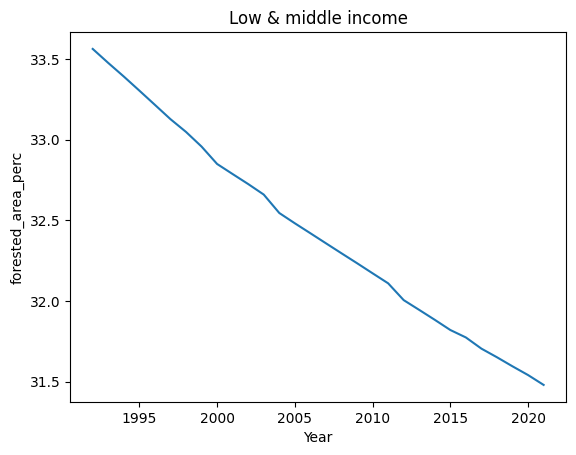

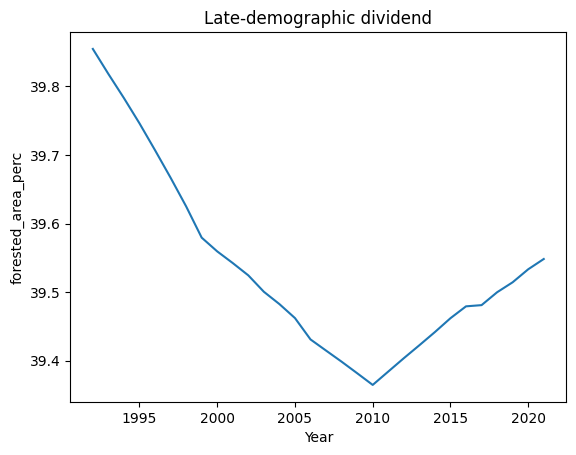

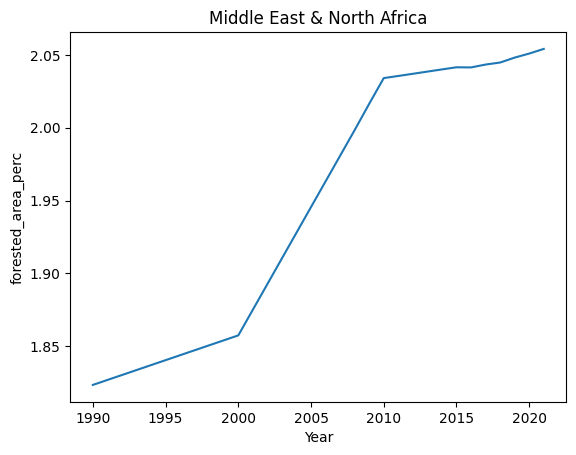

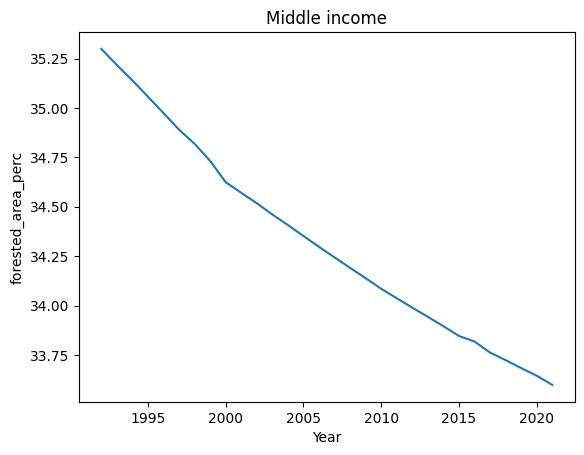

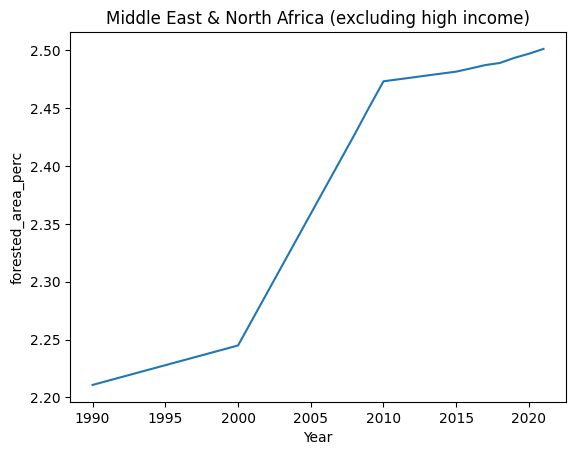

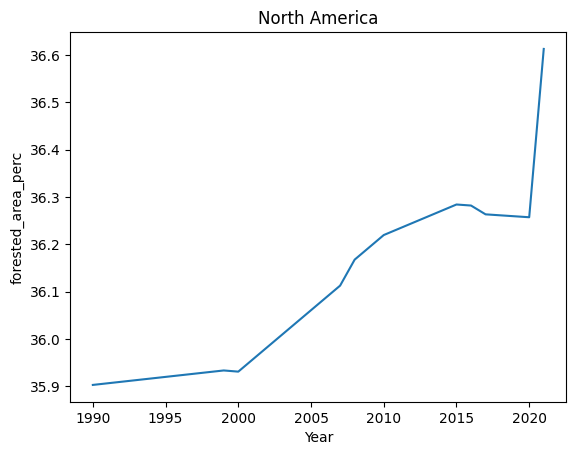

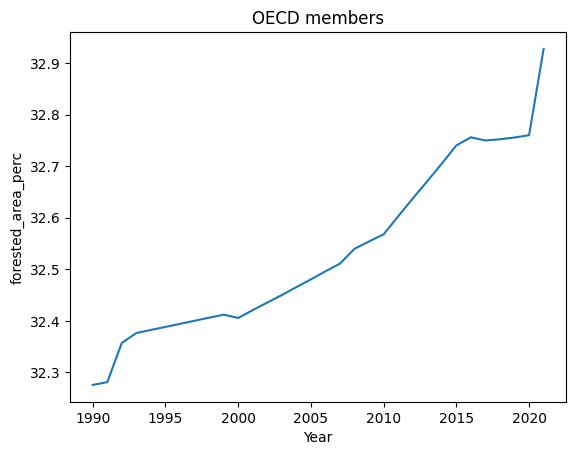

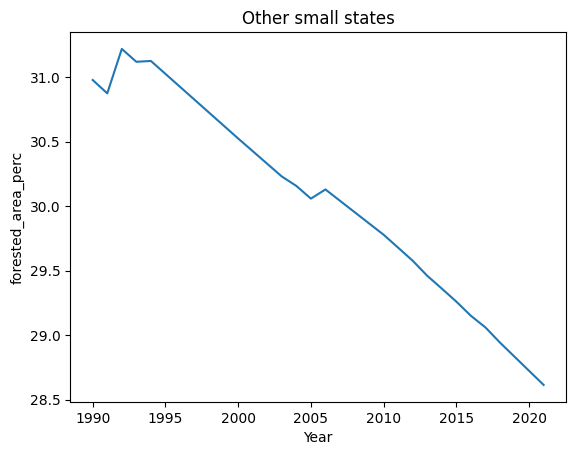

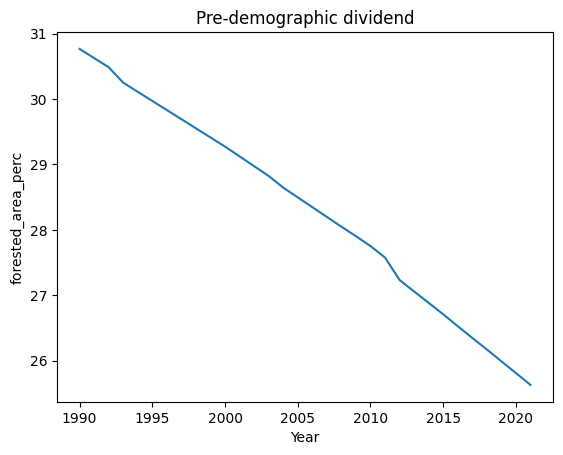

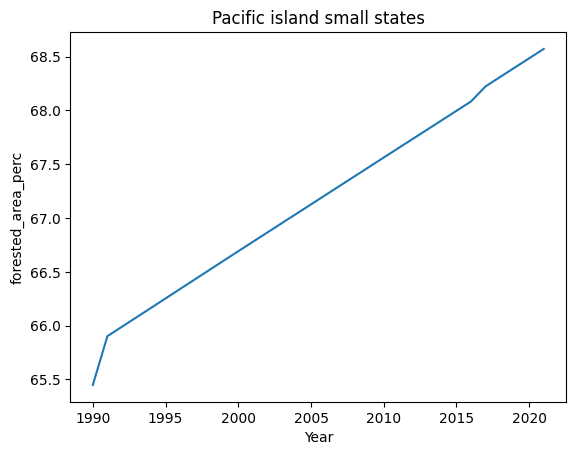

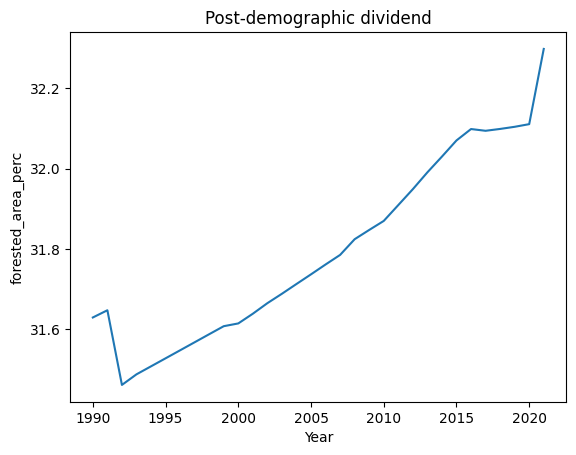

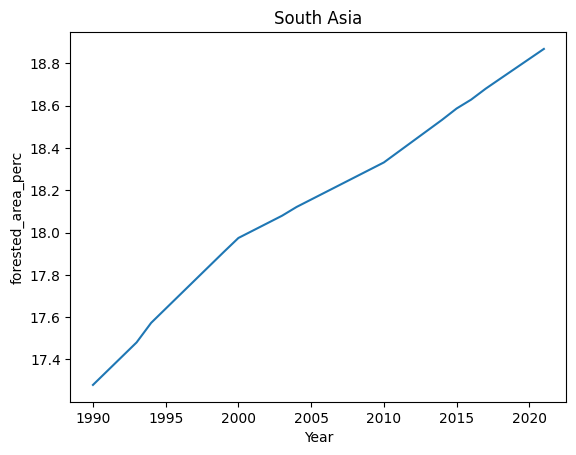

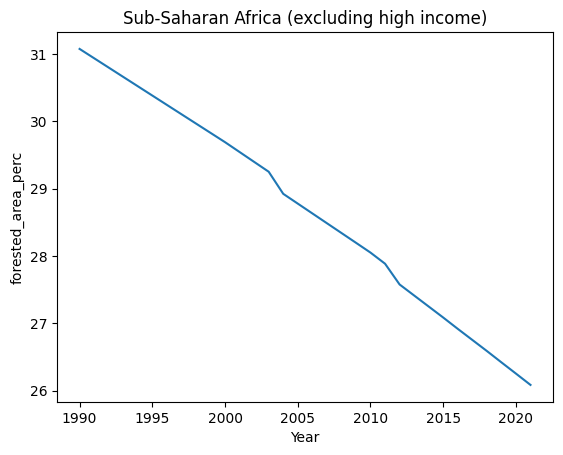

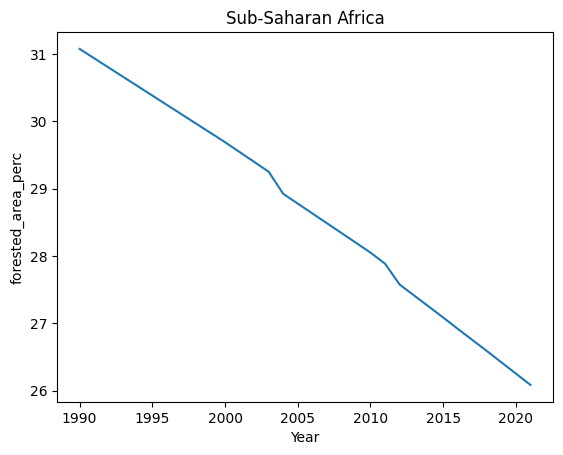

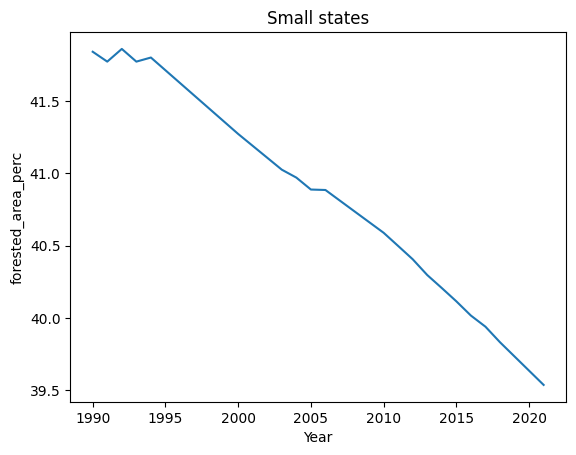

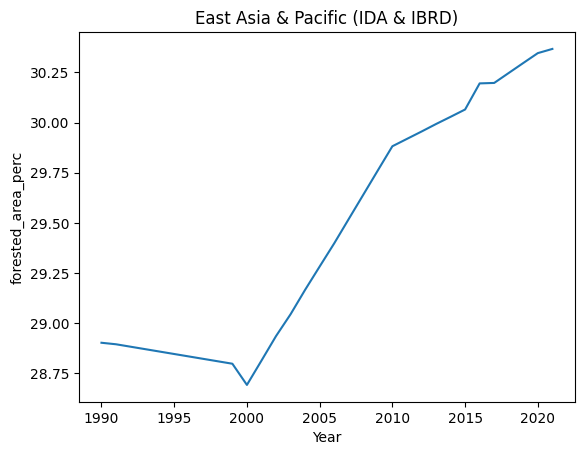

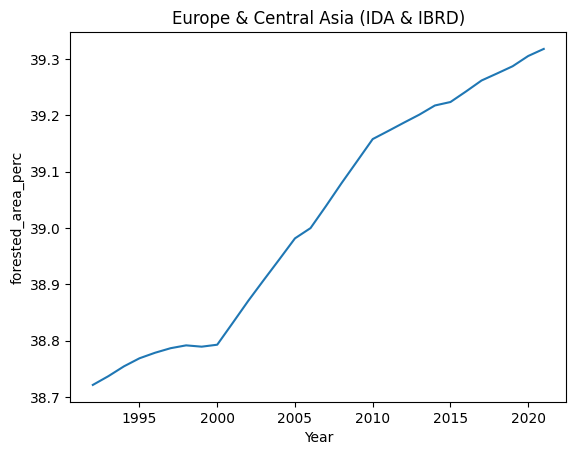

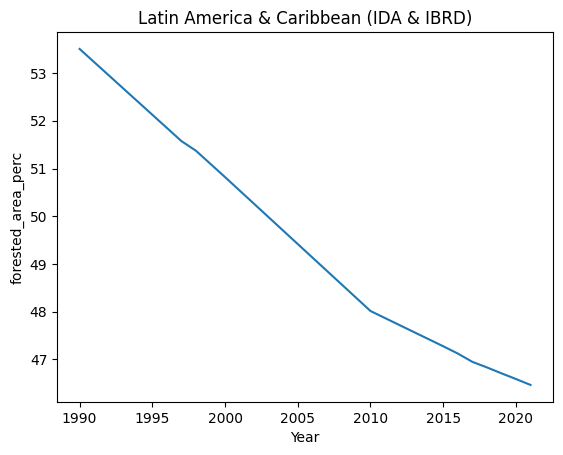

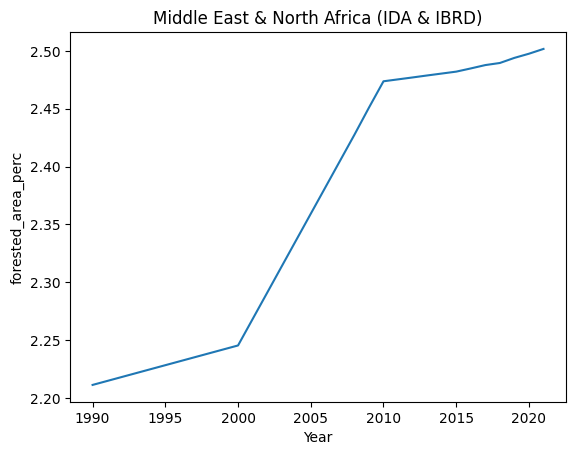

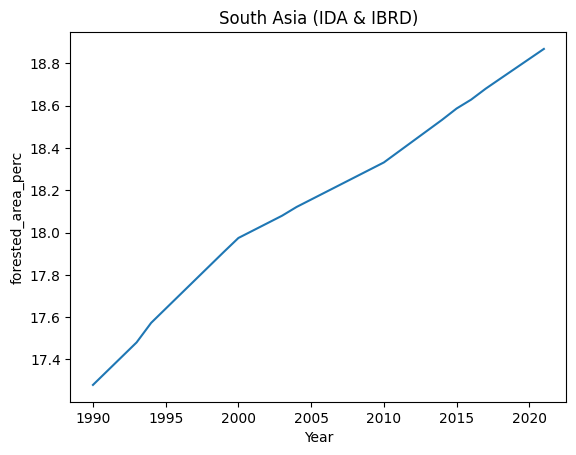

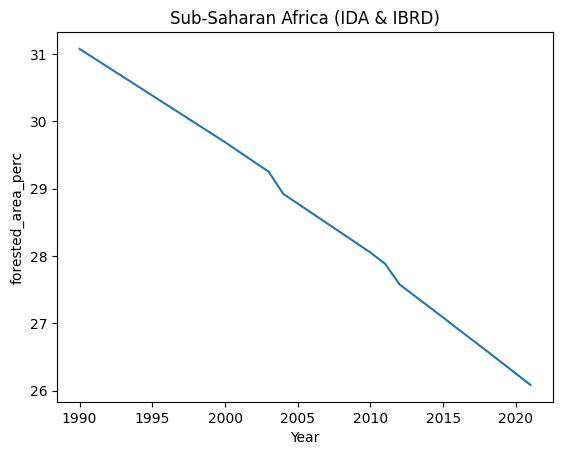

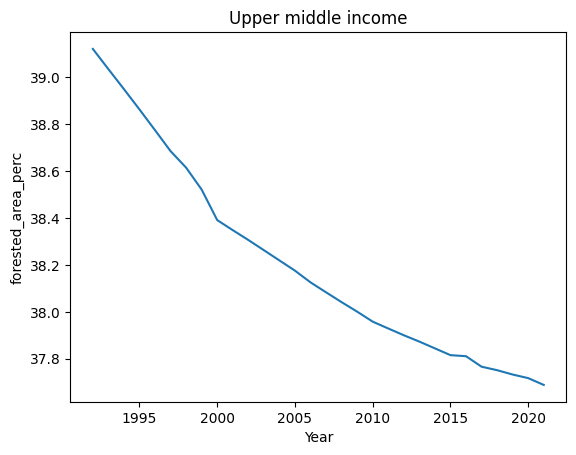

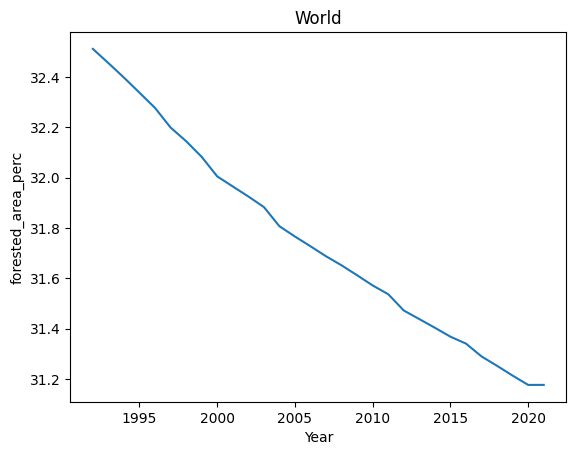

In [13]:
#Show regionwise forested area changes
for i in is_region:
    sns.lineplot(data=df_m.loc[df_m.country_code == i],x='Year',y='forested_area_perc')
    plt.title(df_metadata[df_metadata['Country Code']==i].TableName.tolist()[0])
    plt.show()
